<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-and-familiarizing-with-the-data" data-toc-modified-id="Reading-and-familiarizing-with-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading and familiarizing with the data</a></span></li><li><span><a href="#Visualization-of-features" data-toc-modified-id="Visualization-of-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization of features</a></span></li><li><span><a href="#Creating-models." data-toc-modified-id="Creating-models.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating models.</a></span></li><li><span><a href="#Fitting-and-Model-Evaluation" data-toc-modified-id="Fitting-and-Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting and Model Evaluation</a></span></li><li><span><a href="#Conclusion." data-toc-modified-id="Conclusion.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion.</a></span></li><li><span><a href="#Test-of-NN." data-toc-modified-id="Test-of-NN.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test of NN.</a></span></li></ul></div>

# Pulsar Stars Classification

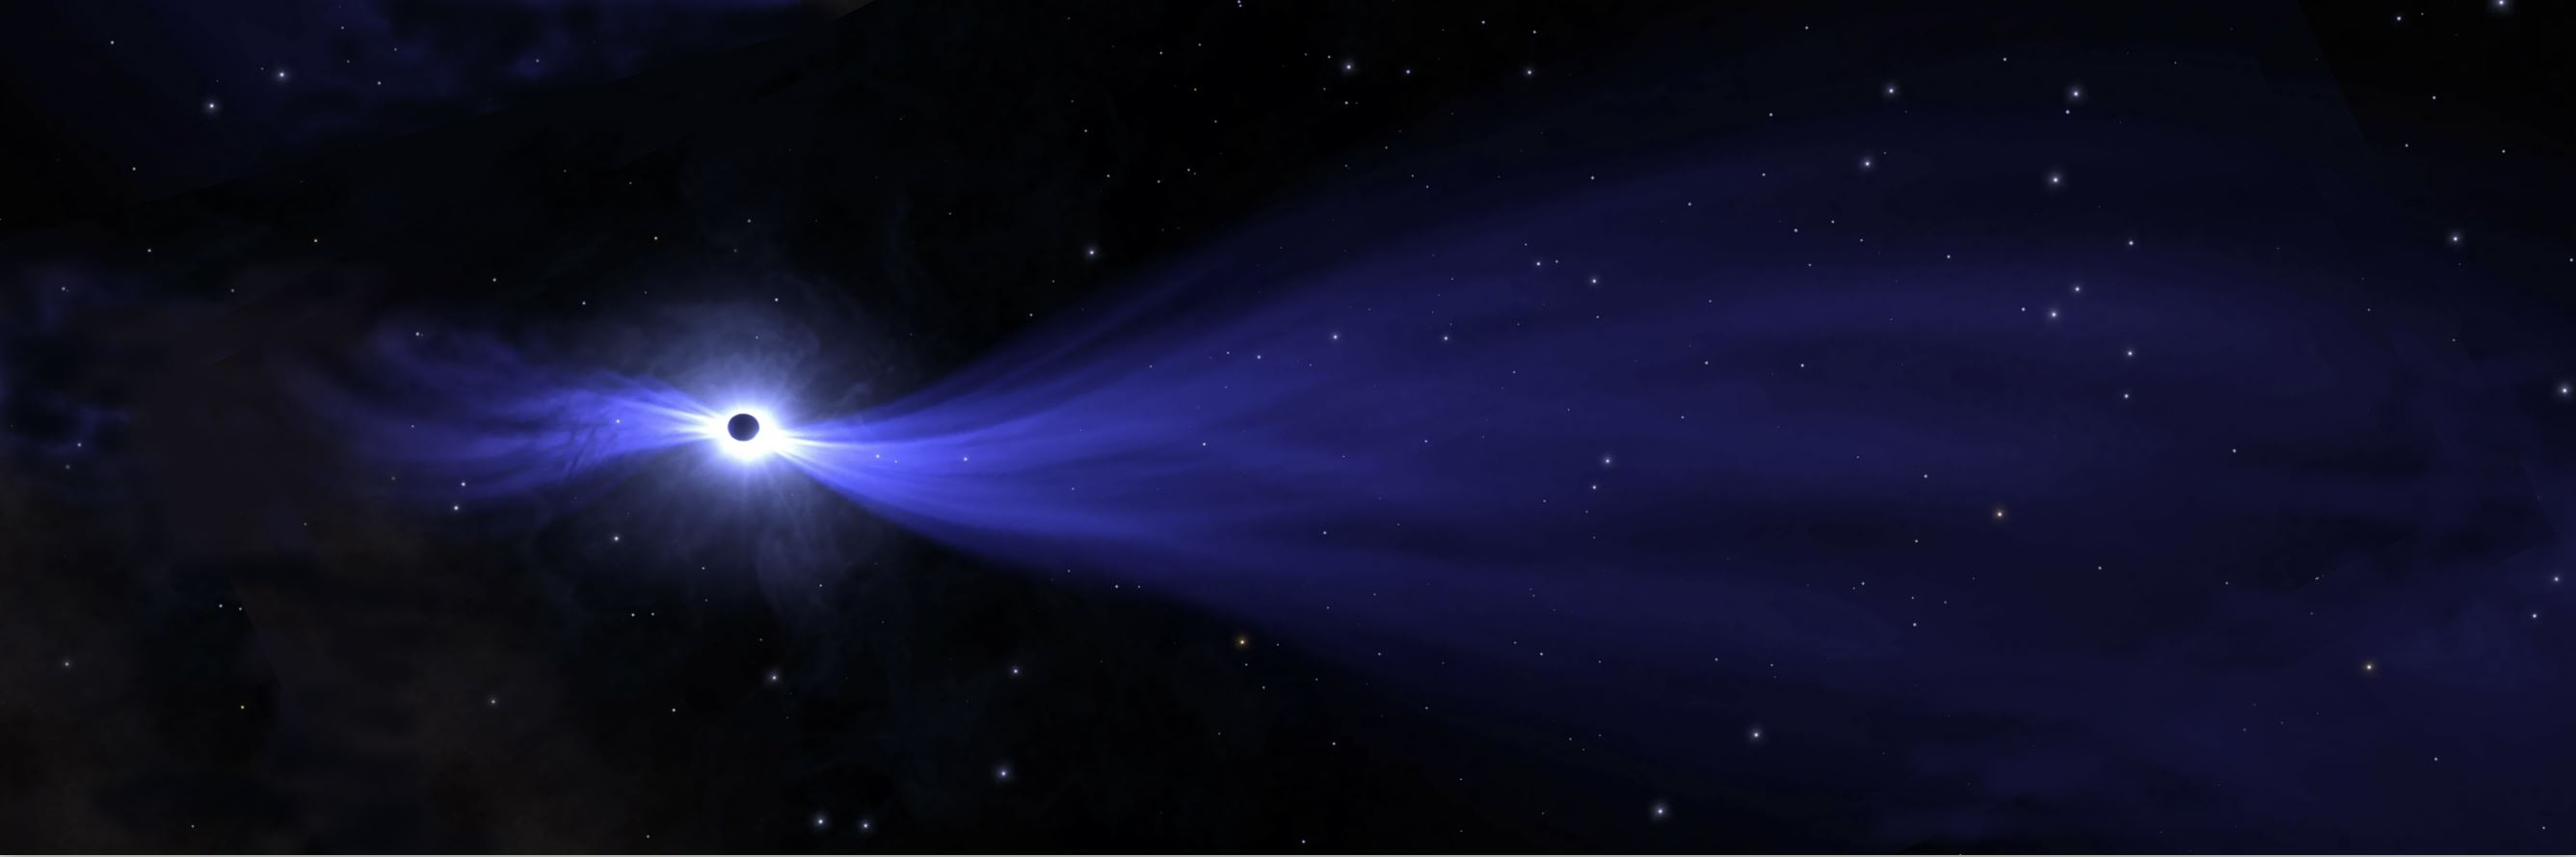

In [1]:
from IPython.display import Image
Image(filename='Stars.jpg')

## Reading and familiarizing with the data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('pulsar_stars.csv')
df.head(3)

Mean_of_the_integrated_profile  \
0                      140.562500   
1                      102.507812   
2                      103.015625   

   Standard_deviation_of_the_integrated_profile  \
0                                     55.683782   
1                                     58.882430   
2                                     39.341649   

   Excess_kurtosis_of_the_integrated_profile  \
0                                  -0.234571   
1                                   0.465318   
2                                   0.323328   

   Skewness_of_the_integrated_profile  Mean_of_the_DM_SNR_curve  \
0                           -0.699648                  3.199833   
1                           -0.515088                  1.677258   
2                            1.051164                  3.121237   

   Standard_deviation_of_the_DM_SNR_curve  \
0                               19.110426   
1                               14.860146   
2                               21.744669   

    Excess_kurtosis_of_the_DM_SNR_curve   Skewness_of_the_DM_SNR_curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   

   target_class  
0             0  
1             0  
2             0

In [4]:
df.shape

(17898, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean_of_the_integrated_profile                17898 non-null  float64
 1   Standard_deviation_of_the_integrated_profile  17898 non-null  float64
 2   Excess_kurtosis_of_the_integrated_profile     17898 non-null  float64
 3   Skewness_of_the_integrated_profile            17898 non-null  float64
 4   Mean_of_the_DM_SNR_curve                      17898 non-null  float64
 5   Standard_deviation_of_the_DM_SNR_curve        17898 non-null  float64
 6    Excess_kurtosis_of_the_DM_SNR_curve          17898 non-null  float64
 7    Skewness_of_the_DM_SNR_curve                 17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
df.isnull().sum()

Mean_of_the_integrated_profile                  0
Standard_deviation_of_the_integrated_profile    0
Excess_kurtosis_of_the_integrated_profile       0
Skewness_of_the_integrated_profile              0
Mean_of_the_DM_SNR_curve                        0
Standard_deviation_of_the_DM_SNR_curve          0
 Excess_kurtosis_of_the_DM_SNR_curve            0
 Skewness_of_the_DM_SNR_curve                   0
target_class                                    0
dtype: int64

In [7]:
df.describe()

Mean_of_the_integrated_profile  \
count                    17898.000000   
mean                       111.079968   
std                         25.652935   
min                          5.812500   
25%                        100.929688   
50%                        115.078125   
75%                        127.085938   
max                        192.617188   

       Standard_deviation_of_the_integrated_profile  \
count                                  17898.000000   
mean                                      46.549532   
std                                        6.843189   
min                                       24.772042   
25%                                       42.376018   
50%                                       46.947479   
75%                                       51.023202   
max                                       98.778911   

       Excess_kurtosis_of_the_integrated_profile  \
count                               17898.000000   
mean                                    0.477857   
std                                     1.064040   
min                                    -1.876011   
25%                                     0.027098   
50%                                     0.223240   
75%                                     0.473325   
max                                     8.069522   

       Skewness_of_the_integrated_profile  Mean_of_the_DM_SNR_curve  \
count                        17898.000000              17898.000000   
mean                             1.770279                 12.614400   
std                              6.167913                 29.472897   
min                             -1.791886                  0.213211   
25%                             -0.188572                  1.923077   
50%                              0.198710                  2.801839   
75%                              0.927783                  5.464256   
max                             68.101622                223.392141   

       Standard_deviation_of_the_DM_SNR_curve  \
count                            17898.000000   
mean                                26.326515   
std                                 19.470572   
min                                  7.370432   
25%                                 14.437332   
50%                                 18.461316   
75%                                 28.428104   
max                                110.642211   

        Excess_kurtosis_of_the_DM_SNR_curve   Skewness_of_the_DM_SNR_curve  \
count                          17898.000000                   17898.000000   
mean                               8.303556                     104.857709   
std                                4.506092                     106.514540   
min                               -3.139270                      -1.976976   
25%                                5.781506                      34.960504   
50%                                8.433515                      83.064556   
75%                               10.702959                     139.309330   
max                               34.539844                    1191.000837   

       target_class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## Visualization of features

The pandas_profiling below shows that all features are Numeric. All variables have high correlation. And one of them, the "Skewness_of_the_integrated_profile" has unique values.

In [8]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Checking the best 3 features for DecisionTree and RandomForest shows that for both models, the best feature is "Excess_kurtosis_of_the_integrated_profile"

Model: DecisionTreeClassifier() 


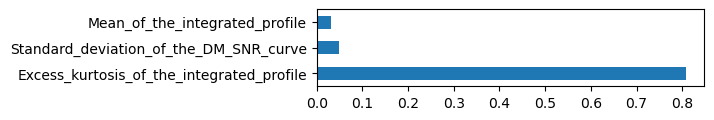

Model: RandomForestClassifier() 


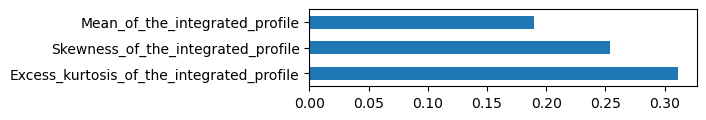

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
X = df.iloc[:,0:8]
y = df.iloc[:,-1]
models = [DecisionTree,
         RandomForest,
         ]
for m in models:
    m.fit(X,y)
    print('Model:\033[07m {} \033[0m'.format(m))
    plt.figure(figsize=(5,1))
    feat_importances = pd.Series(m.feature_importances_, index=X.columns)
    feat_importances.nlargest(3).plot(kind='barh')
    plt.show()

The HeatMap below shows that the main features correlating with the target are
- Excess_kurtosis_of_the_integrated_profile
- Skewness_of_the_integrated_profile

<AxesSubplot:>

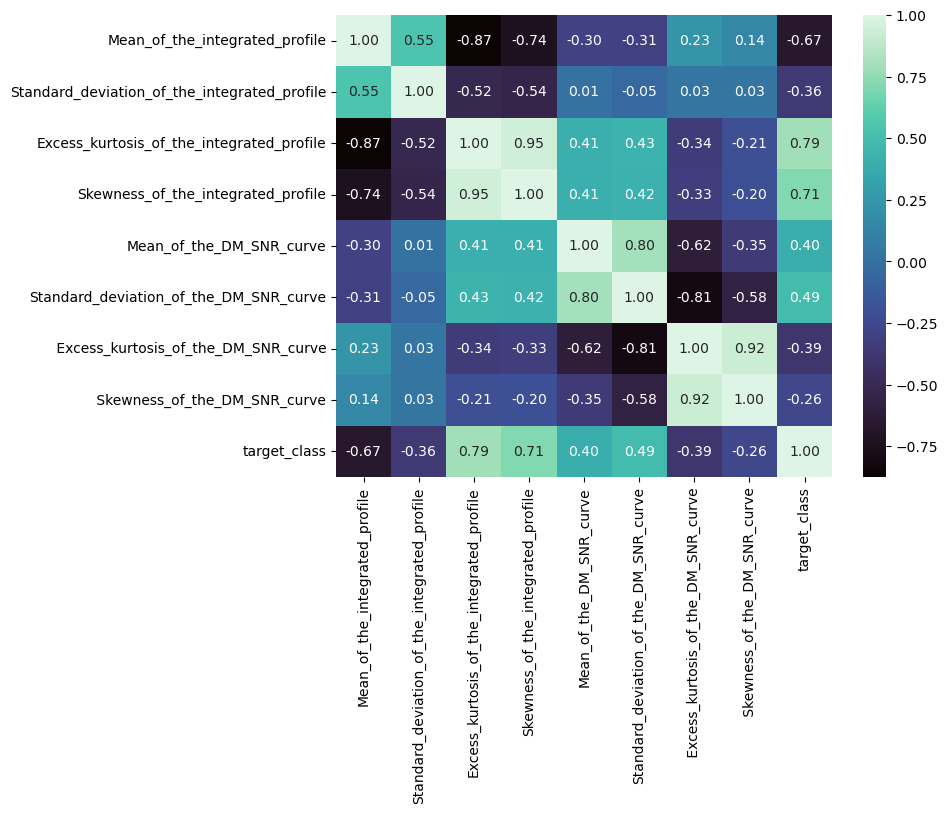

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("mako", as_cmap=True),fmt='.2f')

Features with a high correlation to the result also have a high correlation with each other:

Correlation: 94.57%  


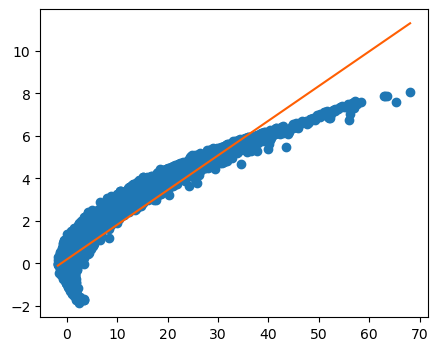

In [11]:
import sklearn
plt.figure(figsize=(5,4))
x = pd.Series(df['Skewness_of_the_integrated_profile'])
y = pd.Series(df['Excess_kurtosis_of_the_integrated_profile'])
correlation = x.corr(y)
print('Correlation:\033[32m \033[01m{:.2f}% \033[30m \033[1m'.format(correlation * 100))
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='#ff5f03')
plt.show()

## Creating models.

In [12]:
df1 = df.copy()
x_data  = df1.drop('target_class',axis=1)
y = df1['target_class']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3,shuffle=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
SVC_linear = SVC(kernel='linear')
KNeighbors = KNeighborsClassifier()
SVC_poly = SVC(kernel='poly')
LogisticRegression = LogisticRegression()

## Fitting and Model Evaluation

Model: DecisionTreeClassifier() 
Test Accuracy : 96.69%  


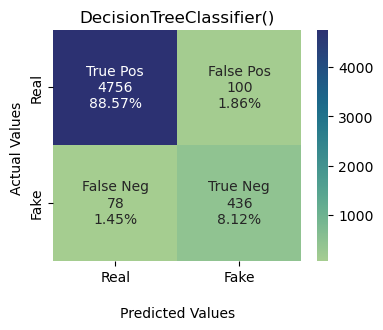

________________________________________
    
    
Model: RandomForestClassifier() 
Test Accuracy : 98.29%  


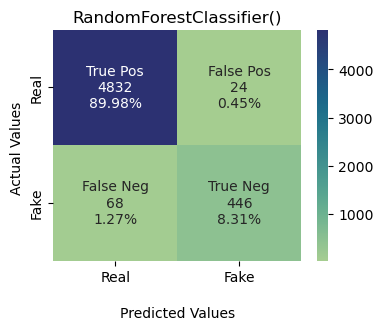

________________________________________
    
    
Model: SVC(kernel='linear') 
Test Accuracy : 97.75%  


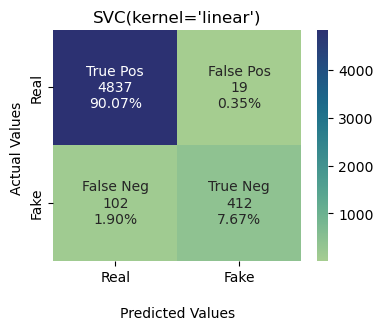

________________________________________
    
    
Model: KNeighborsClassifier() 
Test Accuracy : 97.97%  


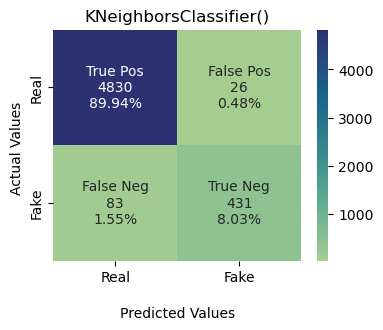

________________________________________
    
    
Model: SVC(kernel='poly') 
Test Accuracy : 98.18%  


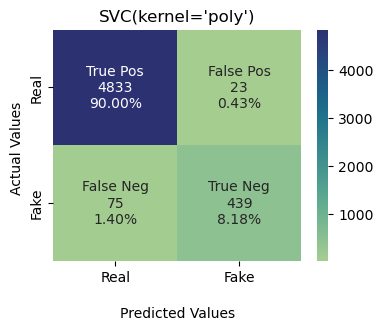

________________________________________
    
    
Model: LogisticRegression() 
Test Accuracy : 97.64%  


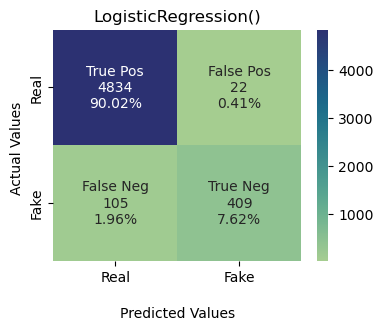

________________________________________
    
    


In [16]:
models = [DecisionTree,
         RandomForest,
         SVC_linear,
         KNeighbors,
         SVC_poly,
         LogisticRegression
         ]
accuracy_test = []
model = []
for m in models:
    m.fit(X_train,y_train)
    prediction = m.predict(X_test)
    Acc_test = m.score(X_test, y_test)
    print('Model:\033[07m {} \033[0m'.format(m))
    print('Test Accuracy :\033[32m \033[01m{:.2f}% \033[30m \033[0m'.format(Acc_test * 100))
    
    
    cf_matrix = confusion_matrix(y_test, prediction)
    group_names = ['True Pos','False Pos','False Neg','True Neg']

    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(4,3))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=sns.color_palette("crest", as_cmap=True))

    ax.set_title(m);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Real','Fake'])
    ax.yaxis.set_ticklabels(['Real','Fake'])
    plt.show()
    
    accuracy_test += [Acc_test * 100]
    model += [m]
    
    print('''________________________________________
    
    ''')

In [112]:
model = pd.Series(model, name='Model').astype(str)
ass_test = pd.Series(accuracy_test, name='Accuracy')
output = pd.concat([model, ass_test], axis=1)

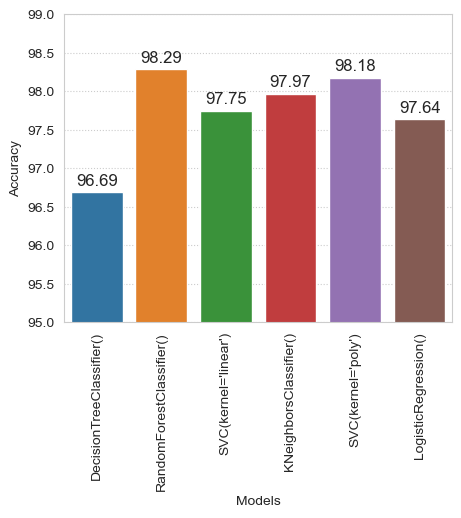

In [115]:
sns.set_style('whitegrid', {'grid.color': '#cccccc', 'grid.linestyle': ':'})
plt.figure(figsize=(5,4))
plots = sns.barplot(data=output, x='Model', y='Accuracy')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.ylim(95,99)
plt.show()

## Conclusion.

The best solution is Random Forest.

## Test of NN.

NN shows a slightly worse result (accuracy is around 97%).

In [116]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [117]:
model1 = Sequential([
    Dense(12, input_shape = (8,), activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(6, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

In [118]:
model1.compile(Adam(learning_rate = .001),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [119]:
model1.fit(X_train, y_train, validation_split = 0.20, batch_size = 10, epochs = 50, shuffle = True, verbose = 2)

Epoch 1/50
1003/1003 - 2s - loss: 0.1732 - accuracy: 0.9594 - val_loss: 0.0907 - val_accuracy: 0.9717 - 2s/epoch - 2ms/step
Epoch 2/50
1003/1003 - 1s - loss: 0.0886 - accuracy: 0.9741 - val_loss: 0.0972 - val_accuracy: 0.9721 - 1s/epoch - 1ms/step
Epoch 3/50
1003/1003 - 1s - loss: 0.0863 - accuracy: 0.9745 - val_loss: 0.0868 - val_accuracy: 0.9753 - 1s/epoch - 1ms/step
Epoch 4/50
1003/1003 - 1s - loss: 0.0849 - accuracy: 0.9751 - val_loss: 0.0853 - val_accuracy: 0.9761 - 1s/epoch - 1ms/step
Epoch 5/50
1003/1003 - 2s - loss: 0.0838 - accuracy: 0.9764 - val_loss: 0.0847 - val_accuracy: 0.9765 - 2s/epoch - 2ms/step
Epoch 6/50
1003/1003 - 1s - loss: 0.0831 - accuracy: 0.9756 - val_loss: 0.0827 - val_accuracy: 0.9777 - 1s/epoch - 1ms/step
Epoch 7/50
1003/1003 - 1s - loss: 0.0832 - accuracy: 0.9761 - val_loss: 0.0863 - val_accuracy: 0.9769 - 1s/epoch - 1ms/step
Epoch 8/50
1003/1003 - 1s - loss: 0.0831 - accuracy: 0.9757 - val_loss: 0.0811 - val_accuracy: 0.9777 - 1s/epoch - 1ms/step
Epoch 9/